# Data Description :

CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting
informative signals. Company wants to build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters.

DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality


# Problem Statement :

The need is to build a regressor which can use these parameters to determine the signal strength or
quality [as number].

# Importing the relevent libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Loading the Dataset

In [ ]:
raw_data = pd.read_csv('/Part- 1,2&3 - Signal.csv')

raw_data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. Data Preprocessing 



# Understanding the data, data types and data description

In [ ]:
# To show the detail description
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* It gives the information about the number of rows, number of columns, data types , memory usage, number of null values in each columns.

* There are 11 indipendent variables and only one dependent variable. Also, the Signal_Strength variable is non-float in nature. Rest all are floatic in nature.

In [ ]:
#Analyze the distribution of the dataset
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
#To get the shape 
raw_data.shape

(1599, 12)

In [ ]:
#To get the number of columns
raw_data.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

# Checking for missing values

In [ ]:
#Checking for missing values in the dataset
raw_data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

# Understanding the outliers using Boxplots

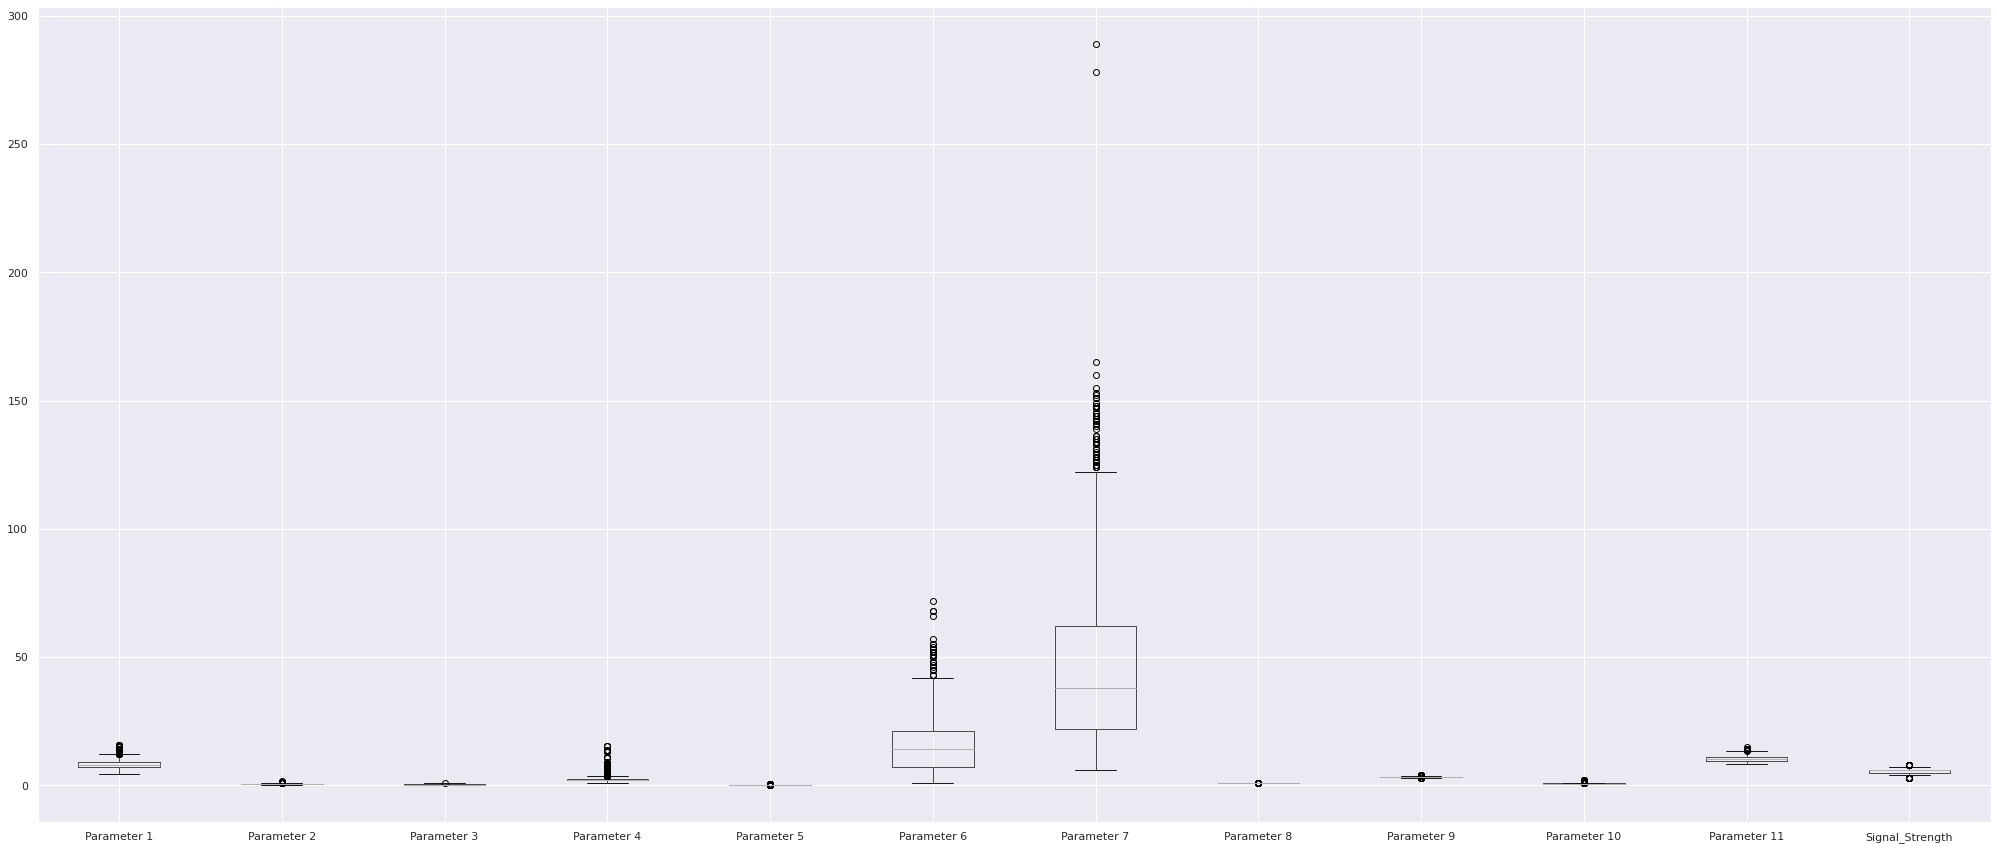

In [ ]:
# Understand the spread and outliers in dataset using boxplot
raw_data.boxplot(figsize=(35,15))

The data columns contains outliers which needs to be treated.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b25d2cc0>,
      dtype=object)

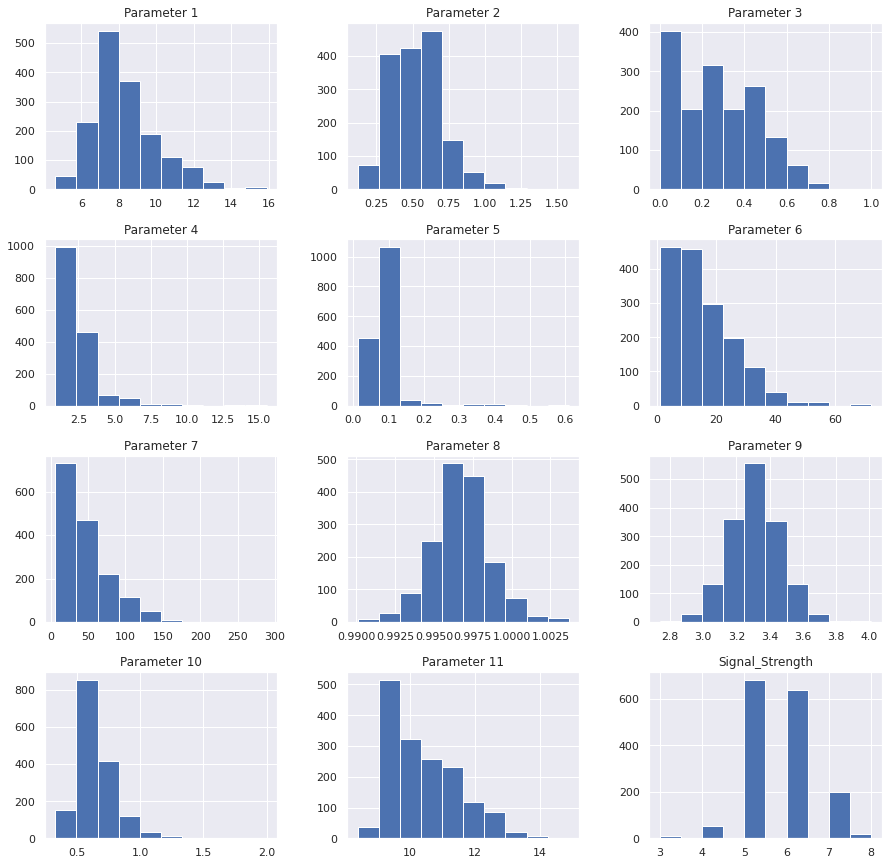

In [ ]:
# Histogram 
raw_data.hist(figsize=(15,15))

This histogram is also displaying the same attributes.

# Handling the Outliers

In [ ]:
#find the outliers and replace them by median
for col_name in raw_data.columns[:-1]:
    q1 = raw_data[col_name].quantile(0.25)
    q3 = raw_data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    raw_data.loc[(raw_data[col_name] < low) | (raw_data[col_name] > high), col_name] = raw_data[col_name].median()

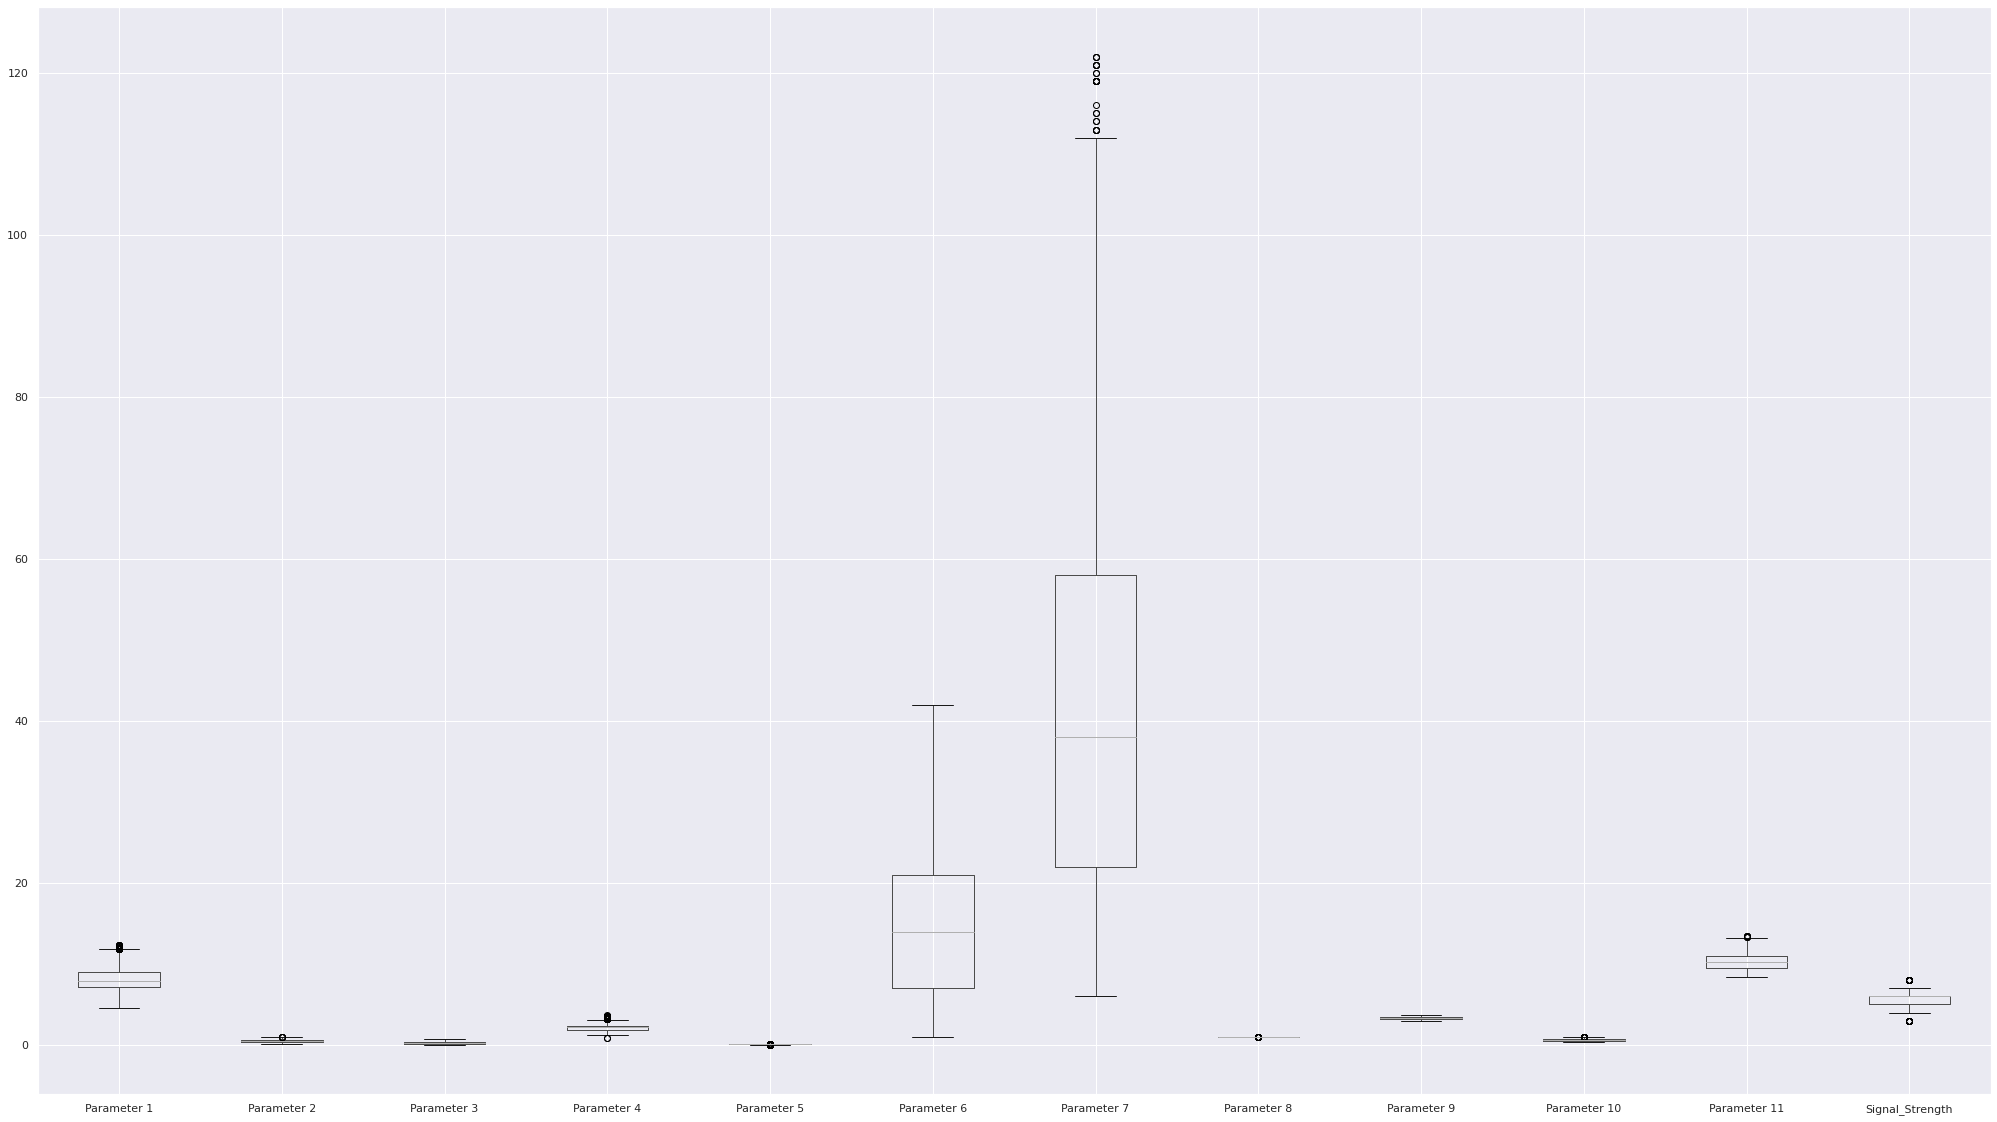

In [ ]:
# again check for outliers in dataset using boxplot
raw_data.boxplot(figsize=(35,20))

Outliers has been dealt with succesfully.

# 2. Understanding the attributes

### Dependent Attribute : Signal_Strength

In [ ]:
raw_data['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

### Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


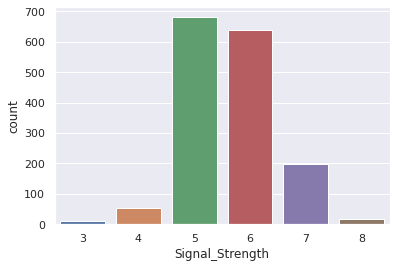

In [ ]:
sns.countplot(raw_data['Signal_Strength'])

###  Independent Attributes

### Multivariate Analysis

In [ ]:
#correlation matrix
cor=raw_data.corr()
cor

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.258476,0.608682,0.225436,0.227814,-0.145813,-0.113789,0.557213,-0.596539,0.176282,-0.048917,0.109637
Parameter 2,-0.258476,1.000000,-0.564257,0.018550,0.138565,0.004853,0.090253,0.000445,0.225681,-0.315552,-0.214283,-0.356247
Parameter 3,0.608682,-0.564257,1.000000,0.156708,0.091785,-0.060658,-0.010996,0.338521,-0.527095,0.277967,0.129530,0.232209
Parameter 4,0.225436,0.018550,0.156708,1.000000,0.229396,0.040756,0.126300,0.372047,-0.064925,0.063026,0.082817,0.035506
Parameter 5,0.227814,0.138565,0.091785,0.229396,1.000000,-0.006299,0.099765,0.375573,-0.184304,-0.059988,-0.260942,-0.162122
Parameter 6,-0.145813,0.004853,-0.060658,0.040756,-0.006299,1.000000,0.596640,-0.018912,0.087431,0.025085,-0.074064,-0.047187
Parameter 7,-0.113789,0.090253,-0.010996,0.126300,0.099765,0.596640,1.000000,0.112545,0.001748,-0.035280,-0.234335,-0.168010
Parameter 8,0.557213,0.000445,0.338521,0.372047,0.375573,-0.018912,0.112545,1.000000,-0.263005,0.120295,-0.472356,-0.164179
Parameter 9,-0.596539,0.225681,-0.527095,-0.064925,-0.184304,0.087431,0.001748,-0.263005,1.000000,-0.021699,0.137582,-0.075837
Parameter 10,0.176282,-0.315552,0.277967,0.063026,-0.059988,0.025085,-0.035280,0.120295,-0.021699,1.000000,0.211820,0.385729


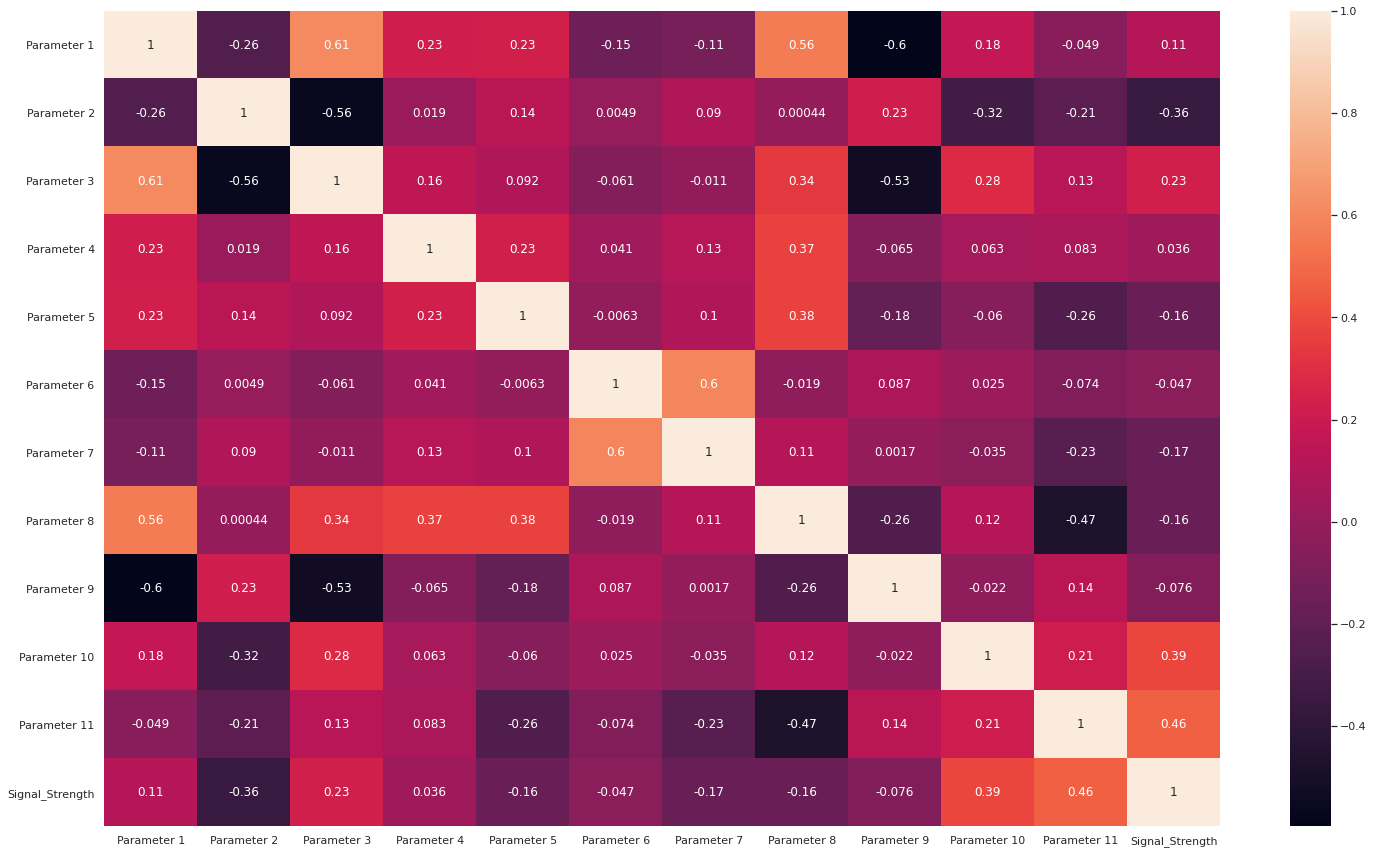

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(raw_data.corr(),annot=True)

* It shows that there are no attributes which are highly correlated with each other.
* For example: Parameter 1 is correlated in a positive way with Parameter 3 & 8. But none are highly co-related with one another.

In [ ]:
# VIF dataframe 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame() 
vif_data["feature"] = raw_data.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(raw_data.values, i) 
                          for i in range(len(raw_data.columns))] 
  
print(vif_data)

            feature          VIF
0       Parameter 1    67.656588
1       Parameter 2    18.724887
2       Parameter 3     7.414328
3       Parameter 4    31.776454
4       Parameter 5    38.260030
5       Parameter 6     6.019536
6       Parameter 7     6.264540
7       Parameter 8  1431.792458
8       Parameter 9  1041.601166
9      Parameter 10    38.170902
10     Parameter 11   157.047652
11  Signal_Strength    76.394446


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
raw_data.drop(['Parameter 8', 'Parameter 9'], axis=1, inplace=True)

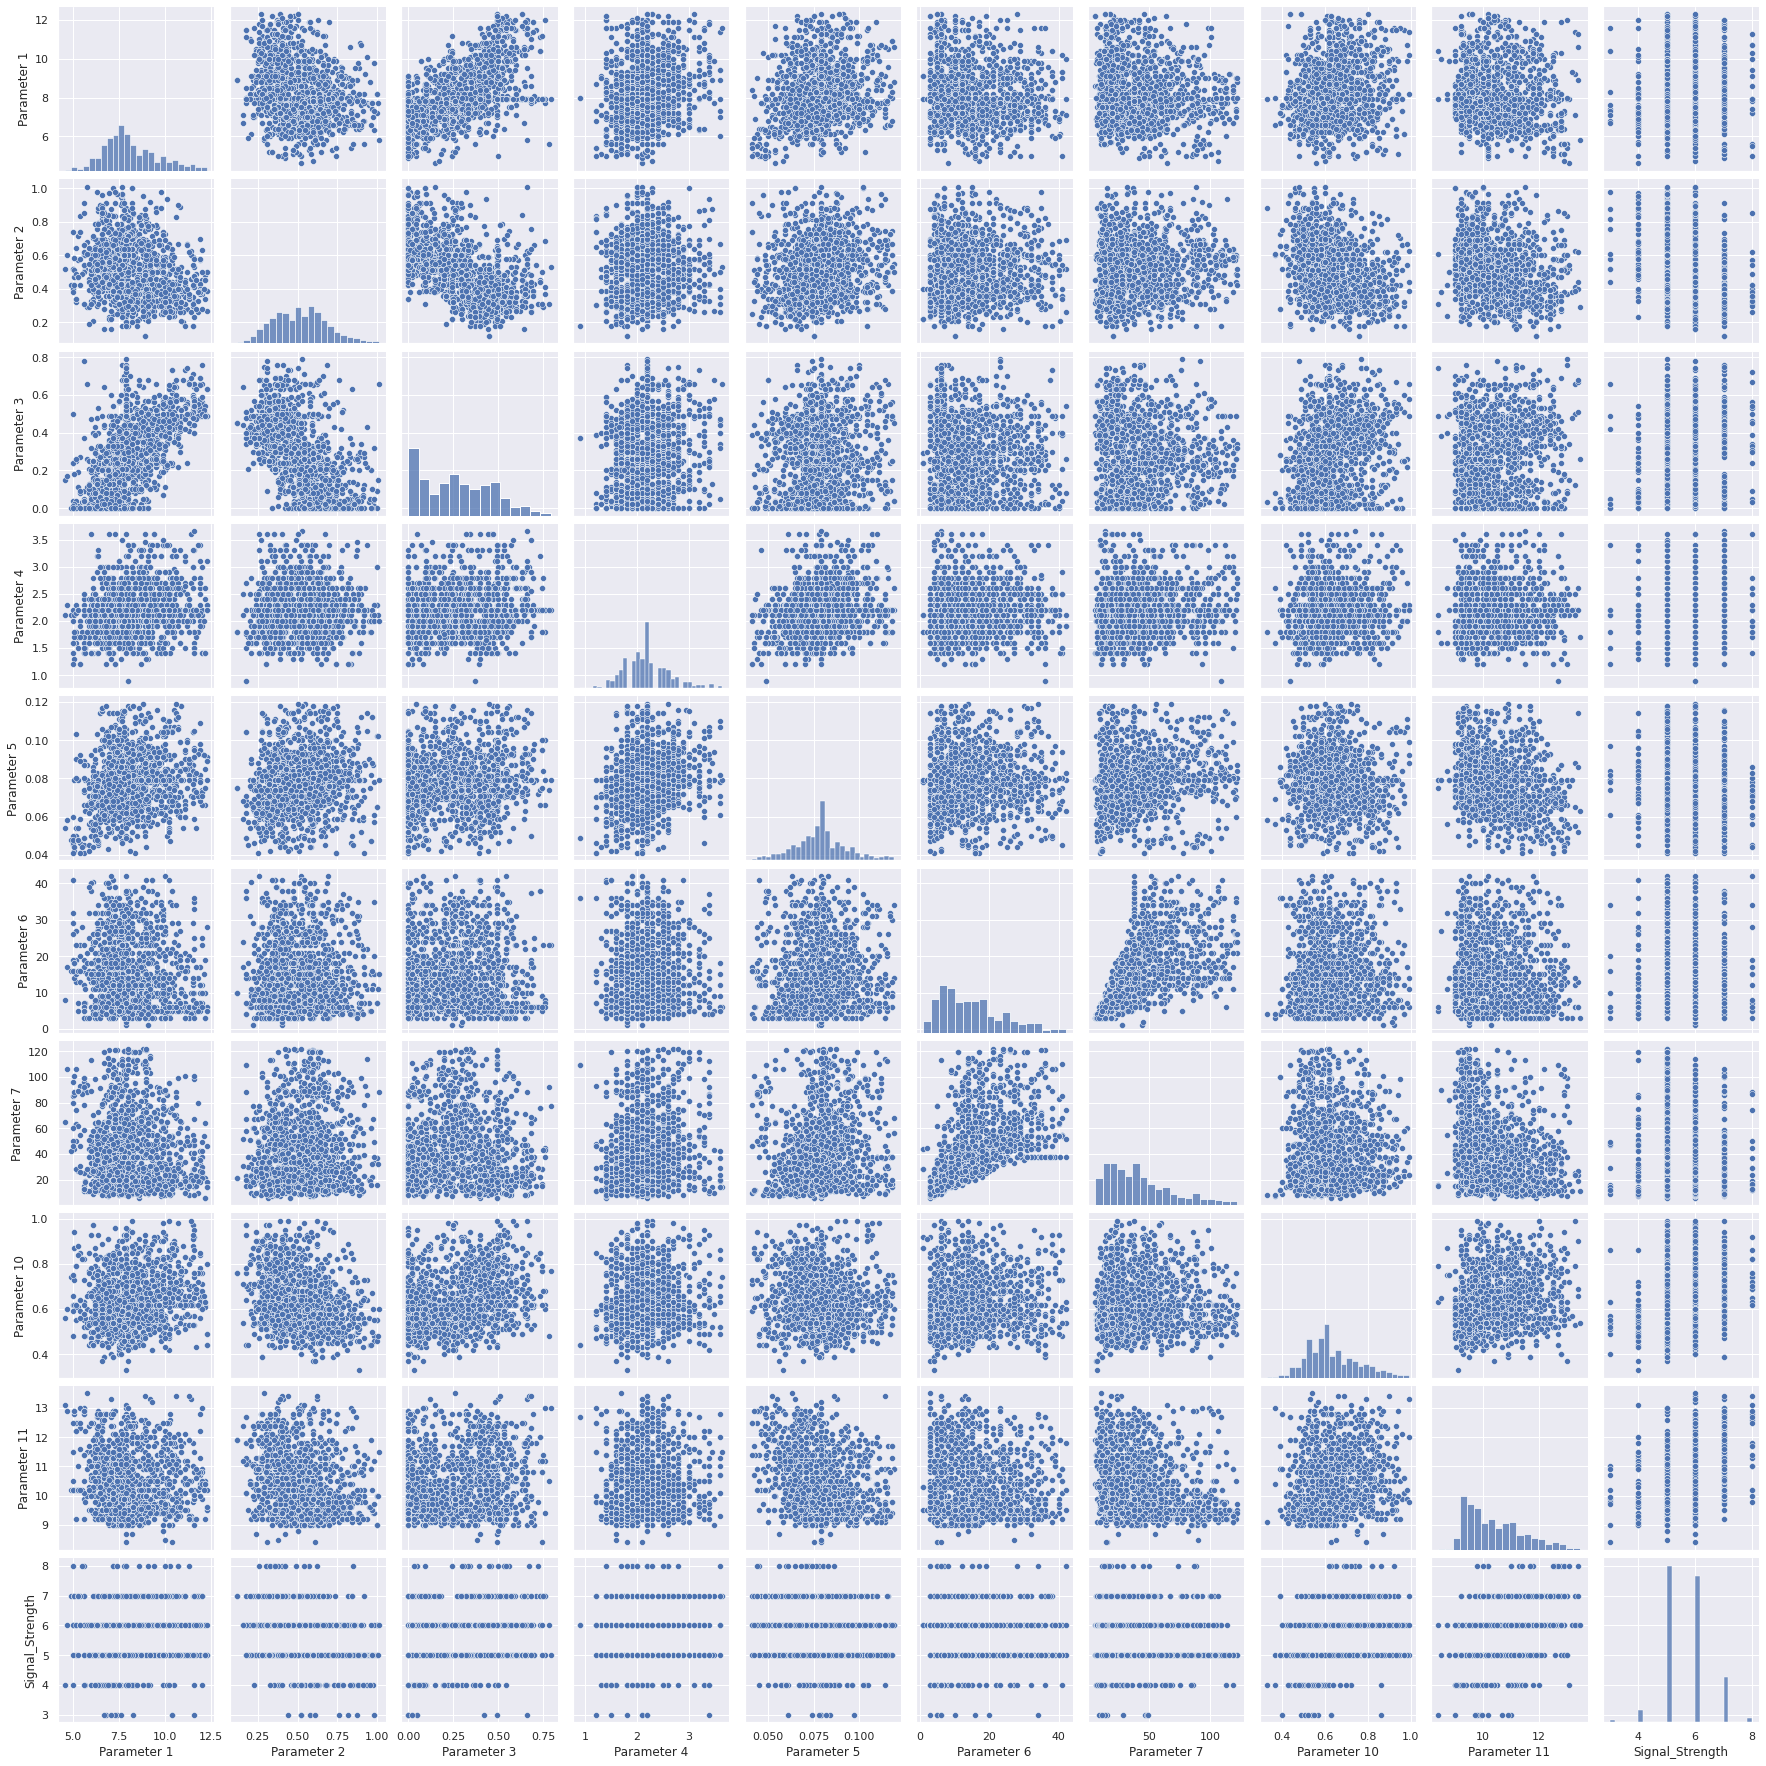

In [ ]:
#pairplot
sns.pairplot(raw_data)

* It is also showing the same information as correlation matrix.

# Regression with TensorFlow

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Splitting the data into independent and dependent attributes

In [ ]:
#independent and dependent variables
X=raw_data.iloc[:,0:9]
y = raw_data.iloc[:,9]

### Scaling the data

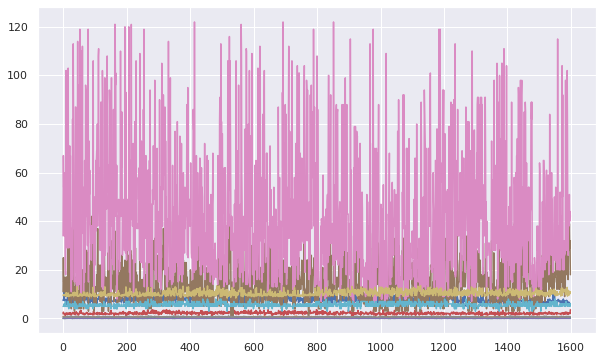

In [ ]:
# prior to scaling

plt.rcParams['figure.figsize']=(10,6)
plt.plot(raw_data)
plt.show()

In [ ]:
from scipy.stats import zscore

# Scaling the independent attributes using zscore
X_z=X.apply(zscore)

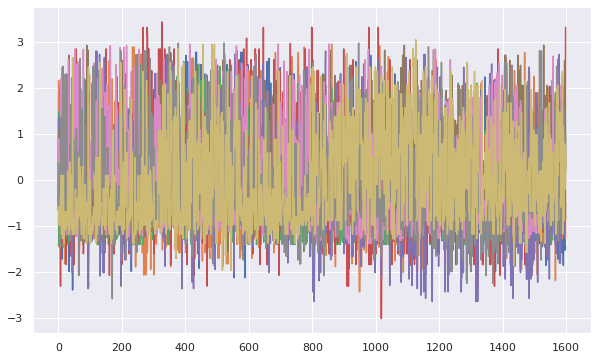

In [ ]:
#plt.plot(X_z,figsize=(20,10))
plt.rcParams['figure.figsize']=(10,6)
plt.plot(X_z)
plt.show()

* We can see that the scaling has brought down the axis substantially and has brought every attribute on the same scale.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_z,y)

In [ ]:
### Let's define a Sequential model using tensorflow.keras.

In [ ]:
# Initialize Sequential model
model = tensorflow.keras.models.Sequential()

# Normalize input data
model.add(tensorflow.keras.layers.BatchNormalization(input_shape=(9,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model.add(tensorflow.keras.layers.Dense(1))

A neural network needs to have an optimizer and a loss function

We will use Stochastic Gradient Descent as an optimizer and MSE (Mean Squared Error) as loss function

We will compile our model now.

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=200, validation_split=0.35)

Epoch 1/200
33/33 [==============================] - 1s 9ms/step - loss: 17.2029 - val_loss: 41.7637
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 1.1211 - val_loss: 9.3693
Epoch 3/200
33/33 [==============================] - 0s 2ms/step - loss: 0.7398 - val_loss: 2.8463
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5972 - val_loss: 1.8828
Epoch 5/200
33/33 [==============================] - 0s 2ms/step - loss: 0.5560 - val_loss: 1.2864
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4954 - val_loss: 0.8892
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5177 - val_loss: 0.7364
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4949 - val_loss: 0.6723
Epoch 9/200
33/33 [==============================] - 0s 2ms/step - loss: 0.4970 - val_loss: 0.5673
Epoch 10/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4680 - val_loss: 0.5225
Epoch 1

In [ ]:
test_x = np.reshape([7,0.64,0,1.7,0.086,14.0,24.0,0.66,9.8],(-1, 9))

test_y = (model.predict(test_x))
print(np.round(test_y))

[[5.]]


### Print shape of the data

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 9)
(1199,)
(400, 9)
(400,)


# Classification with Tensorflow

### One-hot encode the class vector
- Convert class vectors (integers) to binary class matrix
- Convert y_train and y_test
- Number of classes: 9
- We are doing this to use categorical_crossentropy as loss

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (1199, 9)
One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0. 0.]


# DNN

### Initialize a sequential model
- let's a sequential model
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 256
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 9
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(9,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.99)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)

### Compile and fit the model


In [ ]:
lr = 2e-1
Lambda = 1e-4
train_and_test_loop(100, lr, Lambda)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 2.1909 - accuracy: 0.1021
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 1.4636 - accuracy: 0.5525
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 1.2405 - accuracy: 0.5643
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 1.2391 - accuracy: 0.5644
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 1.3702 - accuracy: 0.5234
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 1.2622 - accuracy: 0.5589
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 1.3218 - accuracy: 0.5502
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0669 - accuracy: 0.5712
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 1.1362 - accuracy: 0.5422
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0009 - accuracy: 0.5960
Epoch 11/100
2/2 [===========

# Conclusion :

Accuracy of around 92 % is achieved using Deep Neural Networks. This shows that DNN with right Hyper-parameters can do wonders and achieve a score much better than conventional statistical techniques.